<a href="https://colab.research.google.com/github/Yuliana1453/Analisis-Bike-Sharing-Dataset/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Yuliana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.preprocessing import LabelEncoder


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

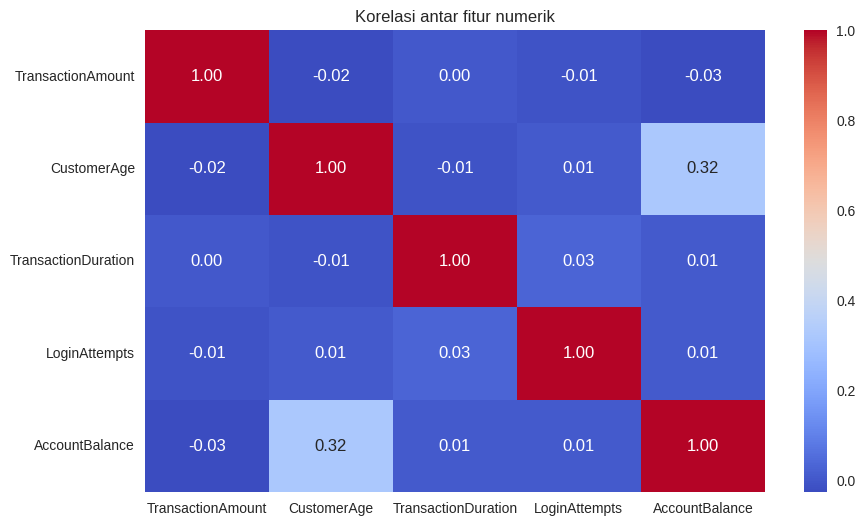

In [6]:
# Menampilkan korelasi antar fitur

correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()

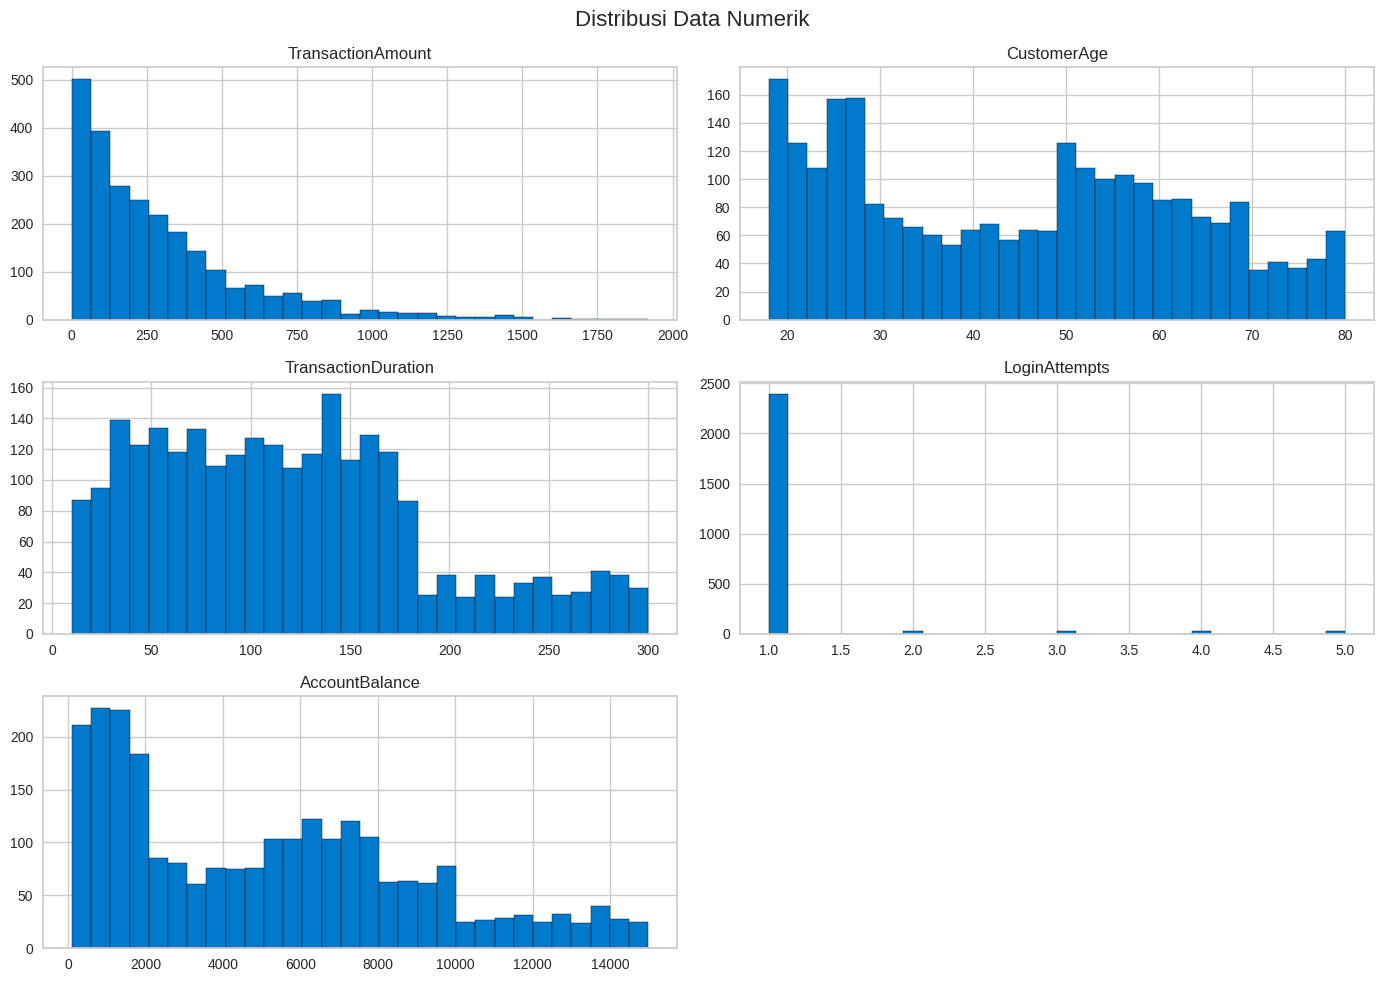

In [7]:
# Menampilkan histogram untuk semua kolom numerik

df.hist(figsize=(14, 10), bins=30, color='#007acc', edgecolor='black')
plt.suptitle('Distribusi Data Numerik', fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**

**1. TransactionAmount**

Distribusi right-skewed (condong ke kanan). Mayoritas transaksi bernilai kecil, sangat sedikit transaksi dengan jumlah besar (>1000).

**2. CustomerAge**

Distribusi agak bimodal, dengan puncak di usia sekitar 20-an dan 50-an tahun. Menunjukkan dua kelompok umur yang dominan sebagai pelanggan.

**3. TransactionDuration**

Distribusi cukup merata, meskipun ada penurunan frekuensi setelah durasi 200 detik. Transaksi bervariasi dalam durasi, namun tidak banyak yang berlangsung sangat lama.

**4. LoginAttempts**

Sangat skewed, dengan hampir semua pengguna hanya melakukan 1 kali login attempt.

**5. AccountBalance**
Distribusi juga right-skewed, sebagian besar nasabah memiliki saldo rendah (<2000). Ada sebagian kecil nasabah dengan saldo sangat tinggi (>10.000), mungkin segmen premium.

**Visualisasi yang lebih informatif**

a. Boxplot untuk mendeteksi outlier:

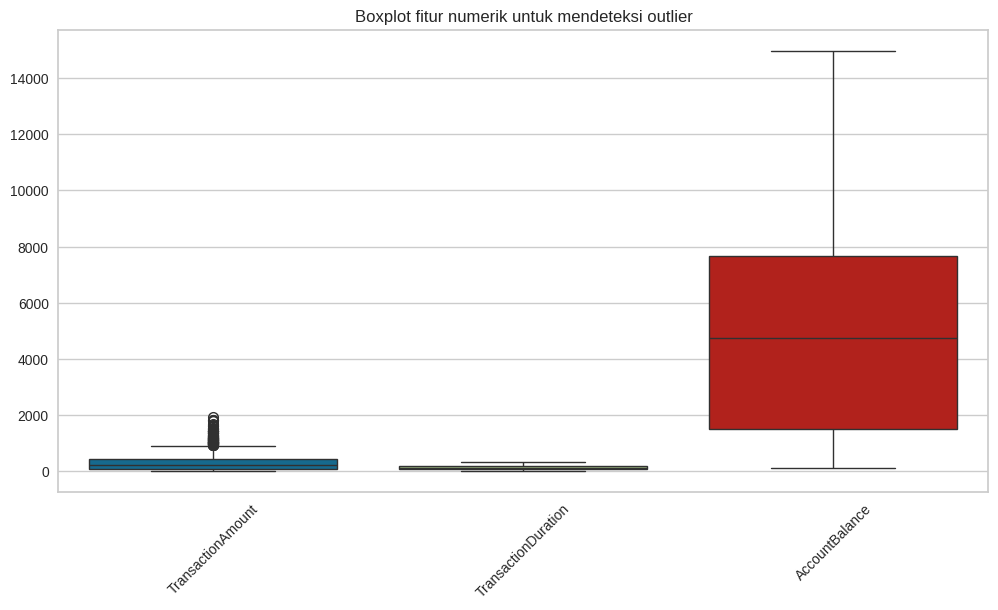

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TransactionAmount', 'TransactionDuration', 'AccountBalance']])
plt.title("Boxplot fitur numerik untuk mendeteksi outlier")
plt.xticks(rotation=45)
plt.show()

**Insight:**

- *TransactionAmount* dan *TransactionDuration* memiliki outlier, namun tidak ekstrem.

- *AccountBalance* memiliki outlier yang sangat tinggi (skew ekstrem ke atas).

b. Distribusi Customer Age berdasarkan Tipe Transaksi

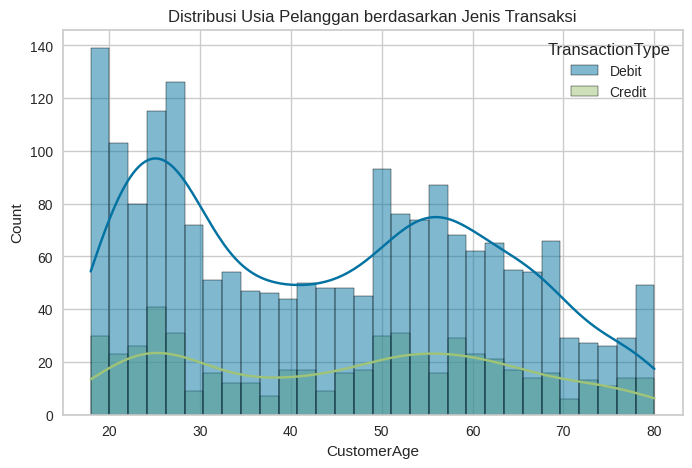

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', kde=True, bins=30)
plt.title("Distribusi Usia Pelanggan berdasarkan Jenis Transaksi")
plt.show()


**Insight:**

- Baik transaksi transfer maupun debit terjadi merata di semua kelompok usia.

- Ada dua puncak distribusi usia:

  - Sekitar usia 20-30 tahun dan 50-60 tahun, mirip dengan distribusi bimodal sebelumnya.

- Tidak ada perbedaan besar dalam pola jenis transaksi antar usia, tapi transfer cenderung lebih banyak dilakukan oleh pelanggan muda.

c. Jumlah transaksi per channel

<ipython-input-10-5016a013f653>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Channel', palette='viridis', order=df['Channel'].value_counts().index)


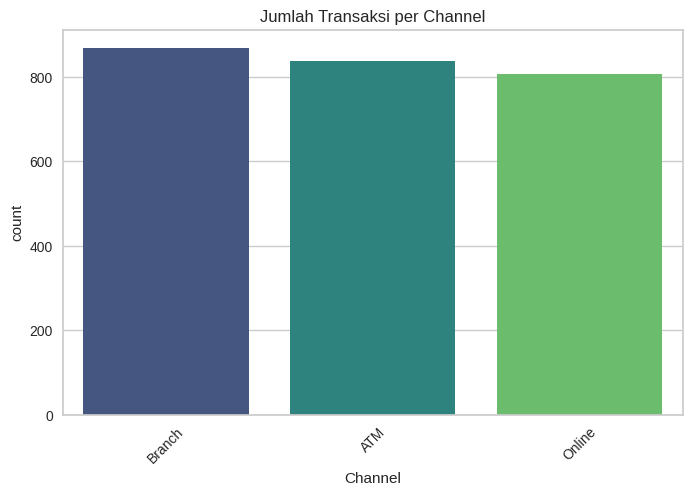

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Channel', palette='viridis', order=df['Channel'].value_counts().index)
plt.title("Jumlah Transaksi per Channel")
plt.xticks(rotation=45)
plt.show()

**Insight:**

Tiga channel (Branch, ATM dan Online) memiliki jumlah transaksi yang hampir sama rata. Artinya distribusi channel cukup seimbang, tidak ada dominasi channel tertentu.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [12]:
df.duplicated().sum()

np.int64(21)

In [13]:
#Menghapus duplikat
df.drop_duplicates(inplace=True)

In [14]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Inisialisasi scaler
scaler = MinMaxScaler()

# Pilih kolom numerik
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Terapkan scaler hanya pada kolom yang tidak null
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [15]:
# Melakukan drop pada kolom yang memiliki keterangan id
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], inplace=True)

In [16]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
le = LabelEncoder()
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # Pastikan tipe datanya string

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [17]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

Pembersihan dan Pra Pemrosesan Data [Skilled]

In [18]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Gunakan fillna untuk imputasi
df['TransactionAmount'].fillna(df['TransactionAmount'].median(), inplace=True)
df['CustomerAge'].fillna(df['CustomerAge'].median(), inplace=True)
df['TransactionDuration'].fillna(df['TransactionDuration'].median(), inplace=True)
df['LoginAttempts'].fillna(df['LoginAttempts'].median(), inplace=True)
df['AccountBalance'].fillna(df['AccountBalance'].median(), inplace=True)

# Untuk kolom kategorikal, gunakan modus (mode)
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop sisa missing jika ada
df.dropna(inplace=True)

<ipython-input-18-211bd552978c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TransactionAmount'].fillna(df['TransactionAmount'].median(), inplace=True)
<ipython-input-18-211bd552978c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [19]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

Pembersihan dan Pra Pemrosesan Data [Advanced]

In [20]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Misalnya kita anggap outlier sebagai data di luar IQR * 1.5
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['TransactionAmount', 'TransactionDuration', 'AccountBalance']:
    df = remove_outliers(df, col)

In [21]:
# binning untuk CustomerAge dan AccountBalance
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[17, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df['BalanceLevel'] = pd.cut(df['AccountBalance'], bins=[0, 3000, 7000, 15000], labels=['Low', 'Medium', 'High'])

# Encode hasil binning
df = pd.get_dummies(df, columns=['AgeGroup', 'BalanceLevel'])

In [22]:
# Ubah nama hasil preprocessing
df_cleaned = df

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [23]:
df_cleaned.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.132057,0.787325,21.302850,1.008082,0.431443,1.524883,0.377645,0.030732,0.339820
std,0.112453,0.438402,12.404398,0.826901,0.285449,1.151187,0.241138,0.148707,0.260986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040952,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.096925
50%,0.103645,1.000000,21.000000,1.000000,0.435484,2.000000,0.353448,0.000000,0.311667
75%,0.191505,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.509400
max,0.467223,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


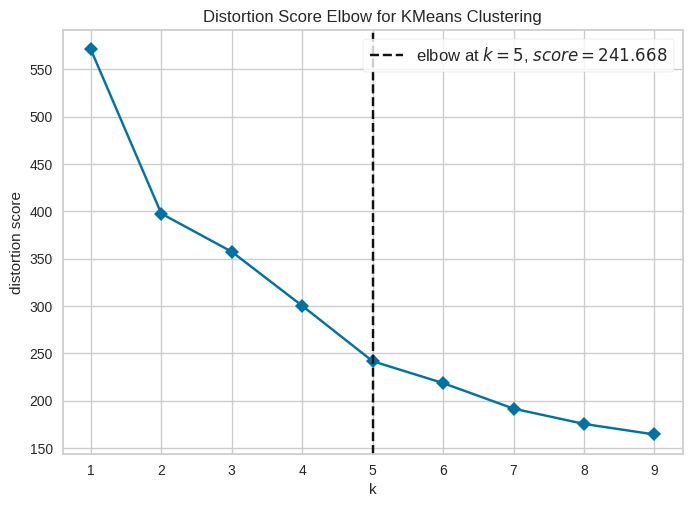

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Fitur numerik yang sudah diskalakan
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Fitur hasil encoding (biner)
encoded_cols = ['AgeGroup_Young', 'AgeGroup_Adult', 'AgeGroup_Middle-Aged', 'AgeGroup_Senior',
                'BalanceLevel_Low', 'BalanceLevel_Medium', 'BalanceLevel_High']

# Gabungkan kedua fitur tersebut
features = numeric_cols + encoded_cols

X = df_cleaned[features]

# Inisialisasi KMeans
model = KMeans(random_state=42)

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)

visualizer.fit(X)
visualizer.show()


In [25]:
optimal_k = visualizer.elbow_value_

In [26]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['cluster'] = model_kmeans.fit_predict(df_cleaned)

ValueError: could not convert string to float: '2023-04-11 16:29:14'

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

Membangun Model Clustering [Skilled]

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df_cluster.drop(columns='cluster'), df_cluster['cluster'])
print("Silhouette Score:", score)

In [ ]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='TransactionAmount', y='CustomerAge', hue='cluster', palette='viridis')
plt.title("Hasil Clustering")

Membangun Model Clustering [Advanced]

In [ ]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster)

# Clustering ulang di data PCA
model = KMeans(n_clusters=5, random_state=42)
cluster_labels = model.fit_predict(df_pca)

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clustering setelah PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# Menambahkan analisis deskriptif untuk setiap cluster
cluster_summary = df_cluster.groupby('cluster').agg(
    # Fitur numerik
    TransactionAmount_mean=('TransactionAmount', 'mean'),
    TransactionAmount_min=('TransactionAmount', 'min'),
    TransactionAmount_max=('TransactionAmount', 'max'),
    CustomerAge_mean=('CustomerAge', 'mean'),
    CustomerAge_min=('CustomerAge', 'min'),
    CustomerAge_max=('CustomerAge', 'max'),
    TransactionDuration_mean=('TransactionDuration', 'mean'),
    TransactionDuration_min=('TransactionDuration', 'min'),
    TransactionDuration_max=('TransactionDuration', 'max'),
    LoginAttempts_mean=('LoginAttempts', 'mean'),
    LoginAttempts_min=('LoginAttempts', 'min'),
    LoginAttempts_max=('LoginAttempts', 'max'),
    AccountBalance_mean=('AccountBalance', 'mean'),
    AccountBalance_min=('AccountBalance', 'min'),
    AccountBalance_max=('AccountBalance', 'max'),
    # Fitur kategorikal, modus untuk setiap cluster
    AgeGroup_Young_mode=('AgeGroup_Young', lambda x: x.mode()[0] if not x.mode().empty else None),
    AgeGroup_Adult_mode=('AgeGroup_Adult', lambda x: x.mode()[0] if not x.mode().empty else None),
    AgeGroup_Middle_Aged_mode=('AgeGroup_Middle-Aged', lambda x: x.mode()[0] if not x.mode().empty else None),
    AgeGroup_Senior_mode=('AgeGroup_Senior', lambda x: x.mode()[0] if not x.mode().empty else None),
    BalanceLevel_Low_mode=('BalanceLevel_Low', lambda x: x.mode()[0] if not x.mode().empty else None),
    BalanceLevel_Medium_mode=('BalanceLevel_Medium', lambda x: x.mode()[0] if not x.mode().empty else None),
    BalanceLevel_High_mode=('BalanceLevel_High', lambda x: x.mode()[0] if not x.mode().empty else None)
)

# Menampilkan hasil analisis deskriptif untuk setiap cluster
print(cluster_summary)


## **Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.**

**1. Cluster 0: (Pelanggan dengan Aktivitas Transaksi Moderat dan Saldo Akun Rendah)**

**Rata-rata (mean):**

- TransactionAmount: 0.1338

- CustomerAge: 0.7157

- TransactionDuration: 0.2786

- LoginAttempts: 0.0041

- AccountBalance: 0.2925

**Rentang:**

- TransactionAmount: Min 0.0003, Max 0.4629

- CustomerAge: Min 0.371, Max 1.0

- TransactionDuration: Min 0.0, Max 0.669

- AccountBalance: Min 0.0013, Max 0.6665

**Analisis:**

*Cluster ini mencakup pelanggan dengan aktivitas transaksi yang relatif moderat dan saldo akun yang lebih rendah. Pelanggan dalam cluster ini cenderung memiliki usia yang lebih dewasa, dengan rata-rata usia lebih dari 70% dari rentang usia. Mereka memiliki waktu transaksi yang tidak terlalu lama dan cenderung melakukan sedikit upaya login. Rekomendasi: Fokus pada penawaran produk dengan biaya lebih rendah dan edukasi mengenai manajemen keuangan.*

----

**2. Cluster 1: (Pelanggan dengan Aktivitas Transaksi Sedikit dan Saldo Akun Rendah)**

**Rata-rata (mean):**

- TransactionAmount: 0.1351

- CustomerAge: 0.1172

- TransactionDuration: 0.3615

- LoginAttempts: 0.0082

- AccountBalance: 0.0975

**Rentang:**

- TransactionAmount: Min 0.0, Max 0.4638

- CustomerAge: Min 0.0, Max 0.4677

- TransactionDuration: Min 0.0, Max 0.997

- AccountBalance: Min 0.0, Max 0.5367

**Analisis:**

*Cluster ini mencakup pelanggan muda dengan tingkat transaksi yang sangat rendah dan saldo akun yang juga rendah. Pelanggan dalam cluster ini kemungkinan besar adalah pengguna baru atau tidak aktif, dengan rata-rata usia yang sangat rendah. Mereka memiliki sedikit upaya untuk login dan durasi transaksi yang lebih tinggi. Rekomendasi: Fokus pada pemicu aktivitas untuk meningkatkan keterlibatan mereka, seperti insentif atau edukasi.*

----
**3. Cluster 2: (Pelanggan dengan Aktivitas Transaksi Lebih Lama dan Saldo Akun Moderat)**

**Rata-rata (mean):**

- TransactionAmount: 0.1257

- CustomerAge: 0.4573

- TransactionDuration: 0.4361

- LoginAttempts: 0.7829

- AccountBalance: 0.3741

*Rentang:*

- TransactionAmount: Min 0.0009, Max 0.4309

- CustomerAge: Min 0.0, Max 1.0

- TransactionDuration: Min 0.0034, Max 0.969

- AccountBalance: Min 0.0146, Max 0.9915

**Analisis:**

*Cluster ini menunjukkan pelanggan dengan aktivitas transaksi yang lebih lama dan saldo akun yang moderat. Usia pelanggan dalam cluster ini beragam, mencakup kelompok muda hingga dewasa. Pelanggan dalam cluster ini cenderung memiliki upaya login yang lebih tinggi dan lebih banyak interaksi dengan platform. Rekomendasi: Fokus pada meningkatkan loyalitas mereka, dengan menawarkan produk keuangan atau hadiah untuk transaksi lebih banyak.*

----

**4. Cluster 3: (Pelanggan dengan Aktivitas Transaksi Panjang dan Saldo Akun Tinggi)**

**Rata-rata (mean):**

- TransactionAmount: 0.1220

- CustomerAge: 0.5267

- TransactionDuration: 0.7251

- LoginAttempts: 0.0049

- AccountBalance: 0.4087

**Rentang:**

- TransactionAmount: Min 0.0005, Max 0.4632

- CustomerAge: Min 0.0978, Max 1.0

- TransactionDuration: Min 0.4310, Max 1.0

- AccountBalance: Min 0.0023, Max 0.9967

**Analisis:**

*Cluster ini terdiri dari pelanggan dengan aktivitas transaksi yang relatif lama dan saldo akun yang cukup tinggi. Usia mereka sedikit lebih dewasa daripada cluster lain. Mereka cenderung memiliki interaksi panjang dengan platform dan saldo yang lebih tinggi. Rekomendasi: Fokus pada produk investasi atau tabungan dengan keuntungan lebih tinggi bagi pelanggan di cluster ini.*

----

**5. Cluster 4: (Pelanggan dengan Aktivitas Transaksi Moderat dan Saldo Akun Tinggi)**

**Rata-rata (mean):**

- TransactionAmount: 0.1334

- CustomerAge: 0.4182

- TransactionDuration: 0.2827

- LoginAttempts: 0.0047

- AccountBalance: 0.6668

**Rentang:**

- TransactionAmount: Min 0.0000, Max 0.4672

- CustomerAge: Min 0.0, Max 0.8387

- TransactionDuration: Min 0.0, Max 0.669

- AccountBalance: Min 0.3457, Max 1.0

**Analisis:**

*Cluster ini mencakup pelanggan dengan saldo akun yang sangat tinggi dan tingkat transaksi moderat. Mereka cenderung memiliki usia yang lebih tua dan saldo yang hampir mencapai nilai maksimal. Rekomendasi: Untuk pelanggan dalam cluster ini, menawarkan produk premium atau layanan dengan nilai tinggi bisa sangat menarik.*

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
#Simpan hasil clustering dengan nama 'Target'
labels = model_kmeans.labels_
df['Target'] = labels

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [ ]:
from google.colab import files
files.download('data_clustering.csv')

Interpretasi Hasil Clustering [Skilled]

In [ ]:
# inverse dataset ke rentang normal
df_inverse_numeric = pd.DataFrame(
    scaler.inverse_transform(df[numeric_cols]),
    columns=numeric_cols
)

# Gabungkan dengan kolom non-numerik (selain numeric_cols)
df_non_numeric = df.drop(columns=numeric_cols)

# Gabungkan kembali semuanya
df_inverse = pd.concat([df_non_numeric.reset_index(drop=True), df_inverse_numeric], axis=1)

In [ ]:
# Hitung mean tiap kolom numerik per cluster
cluster_summary = df_inverse.groupby('Target')[numeric_cols].mean()
cluster_summary

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

**1. Cluster 0: (Senior, Transaksi Cepat, Saldo Sedang)**

**Rata-rata:**

- Jumlah Transaksi: 257.03

- Usia: 62.37 tahun

- Durasi Transaksi: 90.81 detik

- Jumlah Login Attempts: 1.02

- Saldo Rekening: 4,453.42

**Analisis:**

*Nasabah di cluster ini adalah pengguna senior dengan transaksi cepat dan saldo menengah. Mereka berpotensi tertarik pada produk perbankan dengan kemudahan akses dan fitur keamanan yang ramah lansia.*

----

**2. Cluster 1: (Muda, Transaksi Sedang, Saldo Rendah)**

**Rata-rata:**

- Jumlah Transaksi: 259.56

- Usia: 25.27 tahun

- Durasi Transaksi: 114.83 detik

- Login Attempts: 1.03

- Saldo Rekening: 1,551.09

**Analisis:**

*Ini adalah kelompok nasabah muda dengan saldo rendah dan waktu transaksi yang sedang. Cocok untuk ditawari promo cashback, produk e-wallet, atau tabungan pemula.*

----

**3. Cluster 2: (Dewasa, Login Tinggi, Saldo Tinggi)**

**Rata-rata:**

- Jumlah Transaksi: 241.41

- Usia: 46.36 tahun

- Durasi Transaksi: 136.46 detik

- Login Attempts: 4.13

- Saldo Rekening: 5,667.12

**Analisis:**

*Nasabah ini cukup aktif dalam login, dengan saldo yang relatif tinggi. Mereka bisa menjadi target utama untuk produk investasi, kartu kredit premium, atau layanan manajemen kekayaan (wealth management).*

----

**4. Cluster 3: (Paruh Baya, Transaksi Lambat, Saldo Tinggi)**

**Rata-rata:**

- Jumlah Transaksi: 234.39

- Usia: 50.66 tahun

- Durasi Transaksi: 220.27 detik

- Login Attempts: 1.02

- Saldo Rekening: 6,181.39

**Analisis:**

*Nasabah ini melakukan transaksi dengan durasi yang lama dan memiliki saldo tinggi. Kemungkinan mereka lebih berhati-hati, sehingga cocok ditawari program konsultasi finansial atau produk jangka panjang.*

----

**5. Cluster 4: (Produktif, Saldo Sangat Tinggi, Transaksi Normal)**

**Rata-rata:**

- Jumlah Transaksi: 256.30

- Usia: 43.93 tahun

- Durasi Transaksi: 91.98 detik

- Login Attempts: 1.02

- Saldo Rekening: 10,020.40

**Analisis:**

*Nasabah di cluster ini berada dalam usia produktif dan memiliki saldo yang sangat tinggi. Mereka adalah target utama untuk layanan eksklusif seperti priority banking dan investasi skala besar.*

Interpretasi Hasil Clustering [Advanced]

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse_numeric['Target'] = df['Target'].values

In [ ]:
# Simpan Data
df_inverse_numeric.to_csv('data_clustering_inverse.csv', index=False)

In [ ]:
from google.colab import files
files.download('data_clustering_inverse.csv')